# Mapping data on a server using GrandPerspective visualization
awojdyla@lbl.gov, March 2025

We want to provide a visual representation of the disk space taken by various folders, in order to locate trove of data and navigate it more intuitively than using a folder explorer (which is very sequential and slow), taking inspiration on 
[GrandPerspective](http://Gradgrandperspectiv.sourceforge.net).

The goal is to provide ALS users a better way to navigate data using [Bluesky-Tiled](https://blueskyproject.io/tiled/).

_This code was partially generated using Claude 3.7 using [chat.cborg.lbl.gov](chat.cborg.lbl.gov)_

## Loading the appropriate libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import random

## defining functions

In [2]:
def get_directory_size(path):
    """Calculate the size of a directory and its contents"""
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if not os.path.islink(fp):
                try:
                    total_size += os.path.getsize(fp)
                except OSError:
                    pass
    return total_size

def scan_directory(root_path, min_size=1024*1024):
    """Scan a directory and return sizes of all subdirectories"""
    results = []
    
    # Get immediate subdirectories
    try:
        subdirs = [os.path.join(root_path, d) for d in os.listdir(root_path) 
                  if os.path.isdir(os.path.join(root_path, d))]
    except PermissionError:
        return results
        
    # Calculate size for each subdirectory
    for dir_path in subdirs:
        try:
            size = get_directory_size(dir_path)
            if size >= min_size:  # Only include directories above minimum size
                results.append({
                    'path': dir_path,
                    'name': os.path.basename(dir_path),
                    'size': size,
                    'size_mb': size / (1024*1024)
                })
        except PermissionError:
            pass
            
    return results

def generate_colors(n):
    """Generate n distinct colors"""
    colors = []
    for i in range(n):
        # Generate colors with good contrast
        r = random.uniform(0.2, 0.9)
        g = random.uniform(0.2, 0.9)
        b = random.uniform(0.2, 0.9)
        colors.append((r, g, b))
    return colors

def plot_disk_usage(path, min_size_mb=10):
    """Create a treemap visualization of disk usage"""
    # Scan the directory
    results = scan_directory(path, min_size=min_size_mb*1024*1024)
    
    if not results:
        print(f"No directories found in {path} with size >= {min_size_mb}MB")
        return
    
    # Sort by size (largest first)
    results = sorted(results, key=lambda x: x['size'], reverse=True)
    
    # Prepare data for visualization
    sizes = [item['size'] for item in results]
    labels = [f"{item['name']}\n({item['size_mb']:.1f} MB)" for item in results]
    colors = generate_colors(len(results))
    
    # Create plot
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors)
    plt.axis('off')
    plt.title(f"Disk Usage: {path}", fontsize=14)
    plt.tight_layout()
    plt.show()

## example of use on my own computer

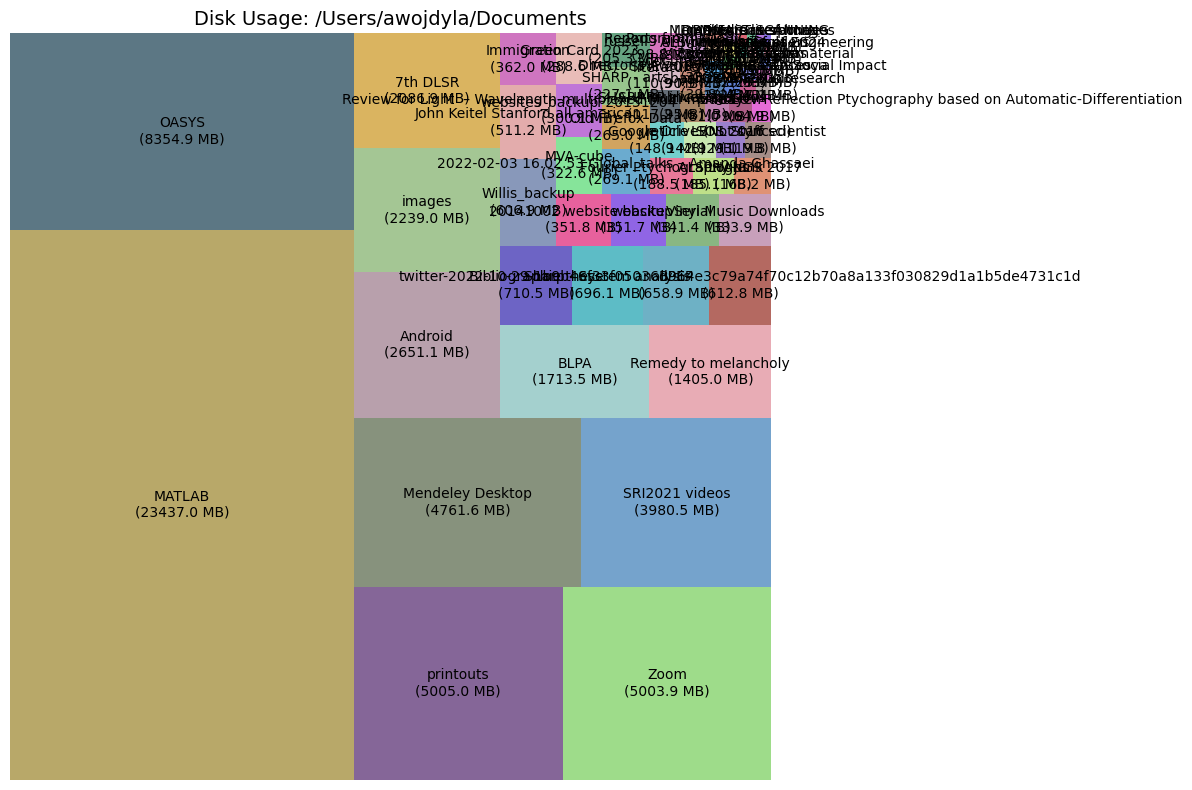

In [3]:
# Example usage
plot_disk_usage("/Users/awojdyla/Documents")